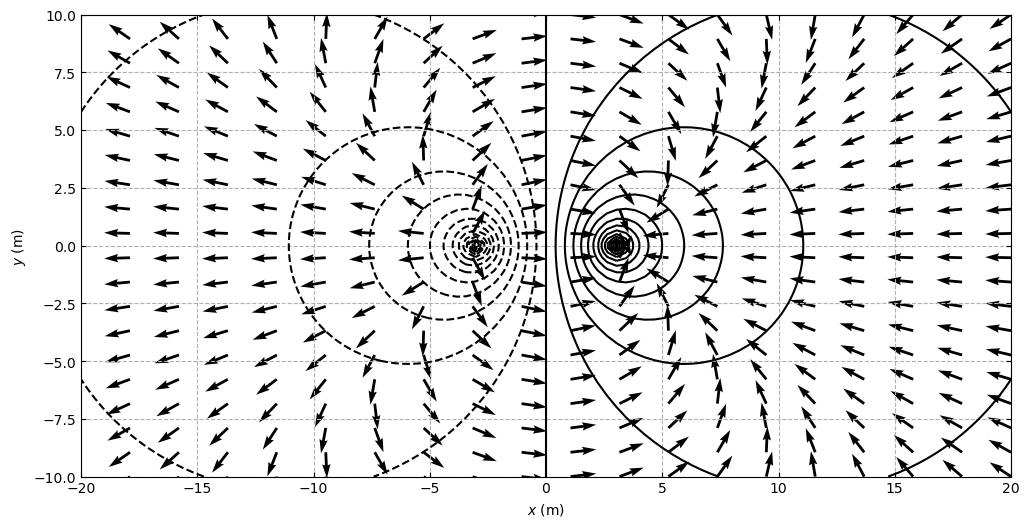

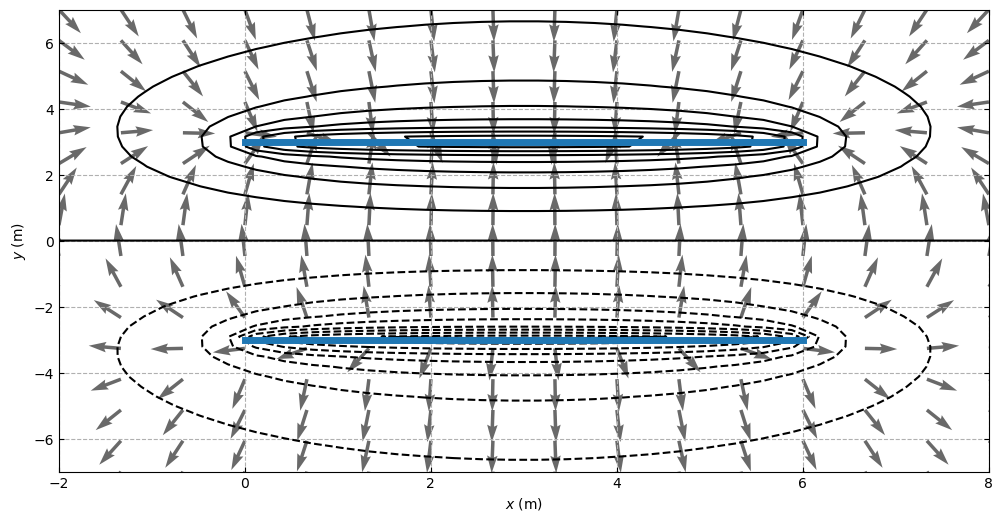

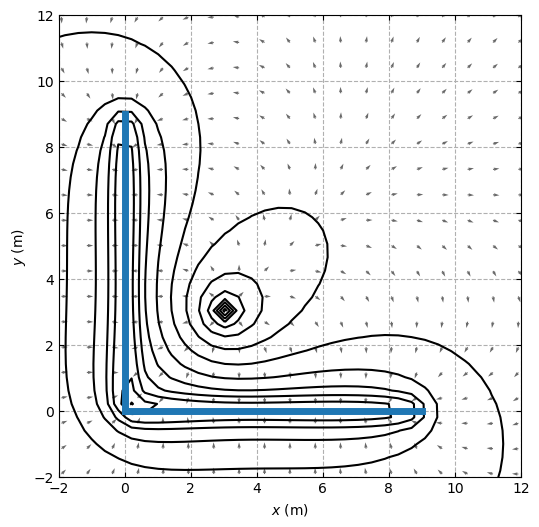

In [12]:
#Importem Llibreries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ct
from scipy import integrate
plt.style.use('default')
from matplotlib import lines

#Definim funcions
#Fil positiu
def V2(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)
    return V
#Fil negatiu
def V1(x, y):
    r0=1
    L=-1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)
    return V
def fV(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=-L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)
    return V
#Placa positiva
h=3
dd=6
L=1
k=1/(4*np.pi*ct.epsilon_0)
def aV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
#Placa negativa
def aV2(x, y):
    V=integrate.quad(lambda d: k*-L/(np.sqrt((x-d)**2+(y+h)**2)), 0, dd)
    return V[0]
#Placa vertical
def vV2(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x)**2+(y-d)**2)), 0, dd)
    return V[0]
#Placa Horitzontal
def hV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
#
#Simulació fils:
#
nx, ny = 100,100
a=10
b=20
d=3
x = np.linspace(-b, b, nx)
y = np.linspace(-a, a, ny)
X, Y = np.meshgrid(x, y)
Z1=V1(X+d,Y)
Z2=V2(X-d,Y)
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.contour(X,Y,Z1+Z2,30,colors='black')
ax1.tick_params(direction='in',top="true",right='true')
ax1.grid(linestyle='dashed')
ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel("$y$ (m)")
nnx=20
nny=20
xx = np.linspace(-b, b, nnx)
yy = np.linspace(-a, a, nny)
XX, YY = np.meshgrid(xx, yy)
ZZ1=V1(XX+d,YY)
ZZ2=V2(XX-d,YY)
G=np.gradient(ZZ1+ZZ2)
norms=np.linalg.norm(G,axis=0)
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx)
plt.show()
fig.savefig('fils.pdf')
#
# CONDENSADOR
#
a=2*dd
x = np.linspace(-a, a+dd, nx)
y = np.linspace(-a, a+dd, ny)
X, Y = np.meshgrid(x, y)
Vv1=np.vectorize(aV1)
Vv2=np.vectorize(aV2)
Z1=Vv1(X,Y)
Z2=Vv2(X,Y)
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.contour(X,Y,Z1+Z2,15,colors='black')
aa=2
e=7
plt.xlim([-aa,dd+aa])
plt.ylim([-e,e])
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
x=[0,dd]
y=[h,h]
y2=[-h,-h]
ax2.plot(x,y,linewidth=5,color='tab:blue')
ax2.plot(x,y2,linewidth=5,color='tab:blue')
ax2.tick_params(direction='in',top="true",right='true')
ax2.grid(linestyle='dashed')
ax2.set_xlabel("$x$ (m)")
ax2.set_ylabel("$y$ (m)")
nnx=16
nny=16
xx = np.linspace(-aa, aa+dd, nnx)
yy = np.linspace(-e, e, nny)
XX, YY = np.meshgrid(xx, yy)
ZZ1=Vv1(XX,YY)
ZZ2=Vv2(XX,YY)
G=np.gradient(ZZ1+ZZ2)
norms=np.linalg.norm(G,axis=0)*2
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx,color='dimgray')
plt.show()
fig2.savefig('cond.pdf')
#
# Personalitzada
#
h=0
dd=9
x = np.linspace(-20, 20, nx)
y = np.linspace(-20,20, ny)
X, Y = np.meshgrid(x, y)
Vh=np.vectorize(hV1)
Vv=np.vectorize(vV2)
ffV=np.vectorize(fV)
m=3
Z1=Vh(X,Y)
Z2=Vv(X,Y)
Z3=ffV(X-m,Y-m)
fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.contour(X,Y,Z1+Z2+Z3,15,colors='black')
aa=3
e=6
ax3.set_xlim([-5,12])
ax3.set_ylim([-5,12])
nnx=40
nny=40
xx = np.linspace(-15, 15, nnx)
yy = np.linspace(-15, 15, nny)
XX, YY = np.meshgrid(xx, yy)
ZZ1=Vh(XX,YY)
ZZ2=Vv(XX,YY)
ZZ3=ffV(XX-m,YY-m)
ZZ4=ffV
G=np.gradient(ZZ1+ZZ2+ZZ3)
norms=np.linalg.norm(G,axis=0)*2
Grad=[np.where(norms==0,0,i/norms) for i in G]
dx=Grad[0]
dy=Grad[1]
plt.quiver(XX, YY,dy,dx,color='dimgray')
ax3.plot([0,dd],[0,0],linewidth=5,color='tab:blue')
ax3.plot([0,0],[0,dd],linewidth=5,color='tab:blue')
ax3.set_aspect('equal', 'box')
ax3.tick_params(direction='in',top="true",right='true')
ax3.grid(linestyle='dashed')
ax3.set_xlabel("$x$ (m)")
ax3.set_ylabel("$y$ (m)")
ax3.set_aspect('equal')
ax3.set_xlim(-2,a)
ax3.set_ylim(-2,a)
plt.show()
fig3.savefig('custom.pdf')